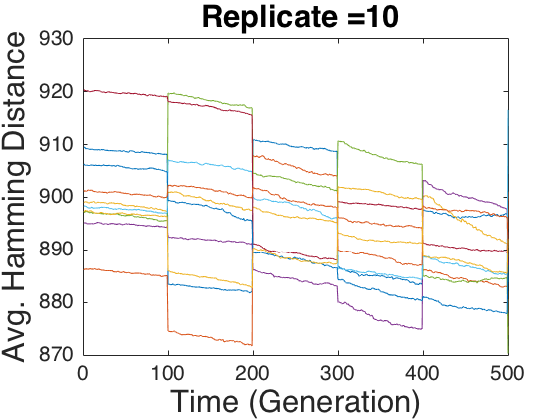

In [2]:
%General Parameters
N = 1000; %population size
num_loci = 1000;%number of loci in accessory genome
m = [100]; %m = [1, 10,50, 100, 1000, 10000];
mu_1 =  10^(-5);%mutation rate
rev_mut = .001;
num_essential = round(.25*num_loci);

%scalar values of some things
s_baggage = .01;%costs
s_gains = .1;%weights
frac_needed_scalar = .1; %fraction_needed
alpha= 1.96;
%vector values of the same things things
% weights = .1 * ones(1, num_loci);%vector of length "num_loci" denoting fitness contribution
%             %of each functional locus when needed
% costs = .001 * ones(1, num_loci);%vector denoting fitness cost of functional loci when not needed
% fraction_needed = .1 * ones(1, num_loci);%vector denoting fraction of environments each locus is needed


%simulation parameters
num_reps = 10; %number of replicate runs
time = 5*m;
%initialize data structures
avg_hamming_dist = nan(num_reps,time);
m_array_index = 0;





%for the figure
close all;
figure(1);
fontSize = 15;






change_rate = m;%number of gens btwn environmental changes


for j = 1:num_reps
    pop = [N,ones(1,num_loci),mu_1]; %starts all individuals with all functional loci
    rand_vect = rand(1,num_loci); %initializes with a random environment
    env = rand_vect<=frac_needed_scalar;
    k=1;
    counter = 0;
    avg_hamming_dist(j,1) = sum(pop(:,2:end-1) ~= repmat(env, [length(pop(:,1)) 1]),2);
    point_in_time = 0;
    
    while k == 1
        
        counter = counter + 1;
        point_in_time = point_in_time + 1;
        if mod(counter,change_rate)==0 %determines if environment should change this generation
            rand_vect = rand(1,num_loci); %initializes with a random environment
            env = rand_vect<=frac_needed_scalar; %resets each environment
        end
        
        pop = mutate3(pop, rev_mut, num_essential); %mutate population
        %%%%%%%%%%% deals with extinction %%%%%%%%%%%%%%%%%%%
        if (size(pop,1) == 1) && (isnan(pop(:,2)))
            break
        end
        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        
        fitnesses = compute_fitness3(pop,s_gains,env,s_baggage); %computes fitnesses for each unique genotype
        
        pop = wright_fisher2(fitnesses); %performs wright_fisher sampling to update population to next generation
        avg_hamming_dist(j,point_in_time) = mean(sum(pop(:,2:end-1) ~= repmat(env, [length(pop(:,1)) 1]),2));
        
        
        
        if point_in_time == time
            k = 0;
        end
        
        
        
    end
    
    
end
x2=1:length(avg_hamming_dist);
y2=avg_hamming_dist;
plot(x2,y2)
title([' Replicate =' num2str(num_reps) ], 'FontSize', fontSize);
ylabel('Avg. Hamming Distance', 'FontSize', fontSize);
xlabel('Time (Generation)', 'FontSize', fontSize);


In [3]:
save('Hamming Distance PolyFit mu 10to-5 .mat')

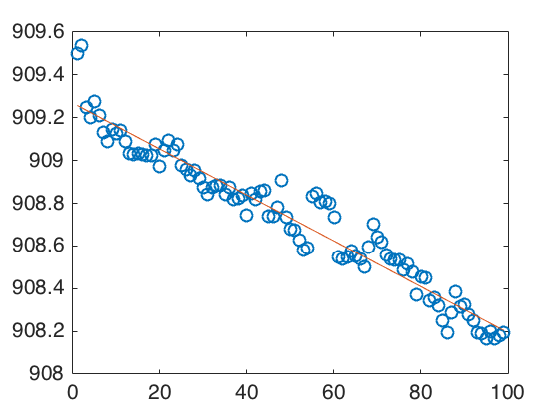

p =

   -0.0107  909.2679


q =

   -0.0107


rsq =

    0.9353

In [25]:
x = 1:99;
y = avg_hamming_dist(1,1:99);
p = polyfit(x,y,1)
q = polyder(p)
f1 = polyval(p,x);
yfit = p(1) * x + p(2);
yresid = y - yfit;
SSresid = sum(yresid.^2);
SStotal = (length(y)-1) * var(y);
rsq = 1 - SSresid/SStotal
figure
plot(x,y,'o')
hold on
plot(x,f1)

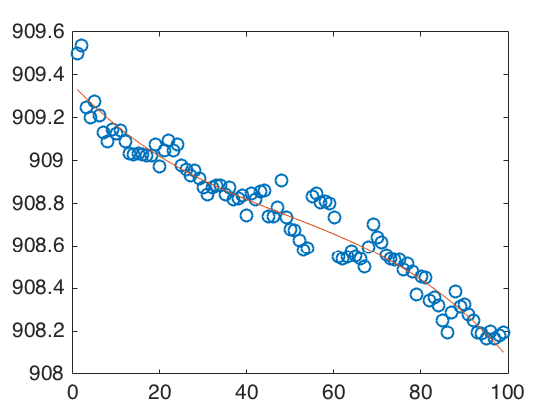

p =

   -0.0000    0.0003   -0.0216  909.3533


q =

   -0.0000    0.0006   -0.0216


rsq =

    0.9485


rsq_adj =

    0.9469

In [28]:
x = 1:99;
y = avg_hamming_dist(1,1:99);
p = polyfit(x,y,3)
q = polyder(p)
f1 = polyval(p,x);
yfit =  p(1) * x.^3 + p(2) * x.^2 + p(3) * x + p(4);
yresid = y - yfit;
SSresid = sum(yresid.^2);
SStotal = (length(y)-1) * var(y);
rsq = 1 - SSresid/SStotal
rsq_adj = 1 - SSresid/SStotal * (length(y)-1)/(length(y)-length(p))
figure
plot(x,y,'o')
hold on
plot(x,f1)


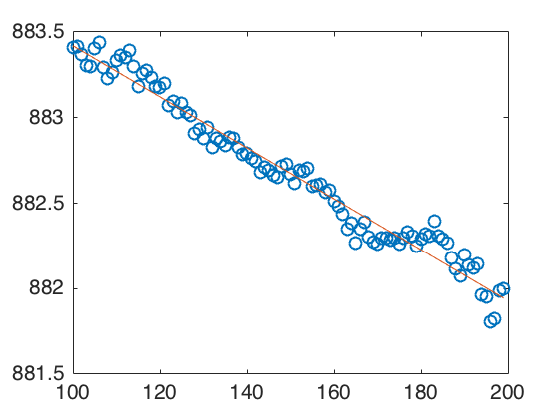

p =

   -0.0149  884.9100


q =

   -0.0149


rsq =

    0.9690

In [26]:
x = 100:199;
y = avg_hamming_dist(1,100:199);
p = polyfit(x,y,1)
q = polyder(p)
f1 = polyval(p,x);
yfit = p(1) * x + p(2);
yresid = y - yfit;
SSresid = sum(yresid.^2);
SStotal = (length(y)-1) * var(y);
rsq = 1 - SSresid/SStotal
figure
plot(x,y,'o')
hold on
plot(x,f1)

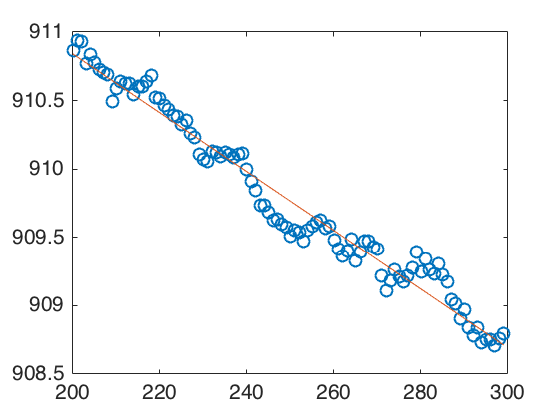

p =

   -0.0215  915.1390


q =

   -0.0215


rsq =

    0.9670

In [27]:
x = 200:299;
y = avg_hamming_dist(1,200:299);
p = polyfit(x,y,1)
q = polyder(p)
f1 = polyval(p,x);
yfit = p(1) * x + p(2);
yresid = y - yfit;
SSresid = sum(yresid.^2);
SStotal = (length(y)-1) * var(y);
rsq = 1 - SSresid/SStotal
figure
plot(x,y,'o')
hold on
plot(x,f1)

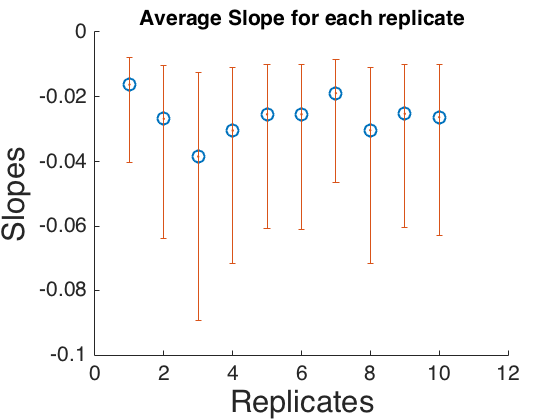

phat =

   -0.0162
   -0.0268
   -0.0384
   -0.0304
   -0.0254
   -0.0254
   -0.0189
   -0.0303
   -0.0252
   -0.0263


ci =

   -0.0242   -0.0083
   -0.0370   -0.0165
   -0.0508   -0.0261
   -0.0414   -0.0194
   -0.0354   -0.0154
   -0.0354   -0.0154
   -0.0275   -0.0103
   -0.0413   -0.0194
   -0.0352   -0.0152
   -0.0365   -0.0161

In [6]:
load('Hamming Distance PolyFit mu= 10^(-5).mat');
time = 5*m;
loci_array = zeros((time/m),(m-1),num_reps);
for z = 1:num_reps
    for j = 1:(time/m)
        for i = 1:(m-1)
            loci_array(j,i,z) = avg_hamming_dist(z, ((j-1)*m+i));
        end
    end
end

for z = 1:num_reps
    for j=1:(time/m)
        if j == 1
            eval(sprintf('x%dz%d = (((j-1)*m)+1):((j-1)*m + m-1);', j,z));
        else
            eval(sprintf('x%dz%d = ((j-1)*m):((j-1)*m + m-2);', j,z)); %in order to keep the indices  the same {199,299,399,499} are not included
        end
        eval(sprintf('y%dz%d = loci_array(j,:,z);', j,z));
        eval(sprintf('p%dz%d = polyfit(x%dz%d,y%dz%d, 1);', j,z,j,z,j,z));
        eval(sprintf('q%dz%d = polyder(p%dz%d);', j,z,j,z));
        eval(sprintf('f%dz%d = polyval(p%dz%d,x%dz%d);', j,z,j,z,j,z));
        eval(sprintf('yfit%dz%d = p%dz%d(1) * x%dz%d + p%dz%d(2);', j,z,j,z,j,z,j,z));
        %eval(sprintf('yfit%dz%d = p%dz%d(1) * x%dz%d + p%dz%d(2) * x%dz%d.^2 + p%dz%d(3) * x%dz%d + p%dz%d(4);', j,z));
        eval(sprintf('yresid%dz%d = y%dz%d - yfit%dz%d;', j,z,j,z,j,z));
        eval(sprintf('SSresid%dz%d = sum(yresid%dz%d.^2);', j,z,j,z));
        eval(sprintf('SStotal%dz%d = (length(y%dz%d)-1)* var(y%dz%d);', j,z,j,z,j,z));
        eval(sprintf('rsq%dz%d = 1 - SSresid%dz%d/SStotal%dz%d;', j,z,j,z,j,z));
        %eval(sprintf('rsq_adj%dz%d = 1 - SSresid%dz%d/SStotal%dz%d*(length(y%dz%d)-1)/(length(y%dz%d)-length(p%dz%d)); ', j,z));
        
    end
end

slopes = zeros(num_reps,(time/m));
rsq_matrix = zeros(num_reps,(time/m));

for z = 1:num_reps
    for j=1:(time/m)
    eval(sprintf('slopes(z,j) = q%dz%d;', j,z));  
    eval(sprintf('rsq_matrix(z,j) = rsq%dz%d;', j,z));    
    end
end

slopes_r1 = sum(slopes(1,:),2)/(time/m);
slopes_r2 = sum(slopes(2,:),2)/(time/m);
slopes_r3 = sum(slopes(3,:),2)/(time/m);
slopes_r4 = sum(slopes(4,:),2)/(time/m);
slopes_r5 = sum(slopes(5,:),2)/(time/m);
slopes_r6 = sum(slopes(6,:),2)/(time/m);
slopes_r7 = sum(slopes(7,:),2)/(time/m);
slopes_r8 = sum(slopes(8,:),2)/(time/m);
slopes_r9 = sum(slopes(9,:),2)/(time/m);
slopes_r10 = sum(slopes(10,:),2)/(time/m);
phat =[slopes_r1;slopes_r2; slopes_r3; slopes_r4;slopes_r5;slopes_r6; slopes_r7; slopes_r8;slopes_r9; slopes_r10]
se = sqrt((abs((1-phat).*(phat)))./N);
ci_plus = phat + alpha*se;
ci_minus = phat - alpha*se;
ci = [ci_minus, ci_plus]
figure
hold on;
scatter([1:length(slopes(:,1))],phat)
errorbar([1:length(slopes(:,1))],phat,ci_minus, ci_plus,'.')
a = [ 'Average Slope for each replicate'];
title(a, 'FontSize', 10);
xlabel('Replicates', 'FontSize', fontSize);
ylabel('Slopes', 'FontSize', fontSize);

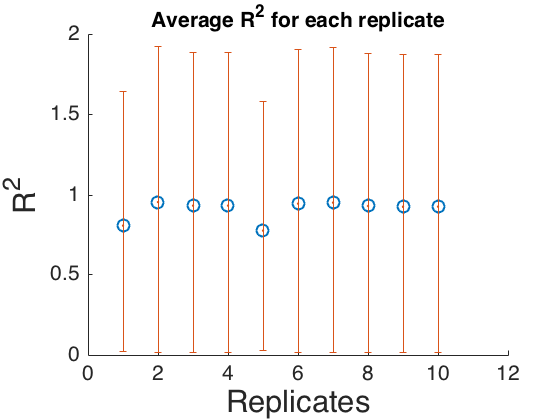

phat =

    0.8100
    0.9556
    0.9334
    0.9342
    0.7790
    0.9456
    0.9523
    0.9317
    0.9268
    0.9282


ci =

    0.7857    0.8344
    0.9429    0.9684
    0.9179    0.9488
    0.9188    0.9496
    0.7533    0.8048
    0.9316    0.9597
    0.9391    0.9655
    0.9161    0.9473
    0.9106    0.9429
    0.9122    0.9442

In [7]:
rsq_r1 = sum(rsq_matrix(1,:),2)/(time/m);
rsq_r2 = sum(rsq_matrix(2,:),2)/(time/m);
rsq_r3 = sum(rsq_matrix(3,:),2)/(time/m);
rsq_r4 = sum(rsq_matrix(4,:),2)/(time/m);
rsq_r5 = sum(rsq_matrix(5,:),2)/(time/m);
rsq_r6 = sum(rsq_matrix(6,:),2)/(time/m);
rsq_r7 = sum(rsq_matrix(7,:),2)/(time/m);
rsq_r8 = sum(rsq_matrix(8,:),2)/(time/m);
rsq_r9 = sum(rsq_matrix(9,:),2)/(time/m);
rsq_r10 = sum(rsq_matrix(10,:),2)/(time/m);
phat =[rsq_r1;rsq_r2; rsq_r3; rsq_r4;rsq_r5;rsq_r6; rsq_r7; rsq_r8;rsq_r9; rsq_r10]
se = sqrt((abs((1-phat).*(phat)))./N);
ci_plus = phat + alpha*se;
ci_minus = phat - alpha*se;
ci = [ci_minus, ci_plus]
figure
hold on;
scatter([1:length(slopes(:,1))],phat)
errorbar([1:length(slopes(:,1))],phat,ci_minus, ci_plus,'.')
a = [ 'Average R^{2} for each replicate'];
title(a, 'FontSize', 10);
xlabel('Replicates', 'FontSize', fontSize);
ylabel('R^{2}', 'FontSize', fontSize);

In [8]:
save('Hamming Distance PolyFit mu= 10^(-5) test.mat');

Constant environment tests


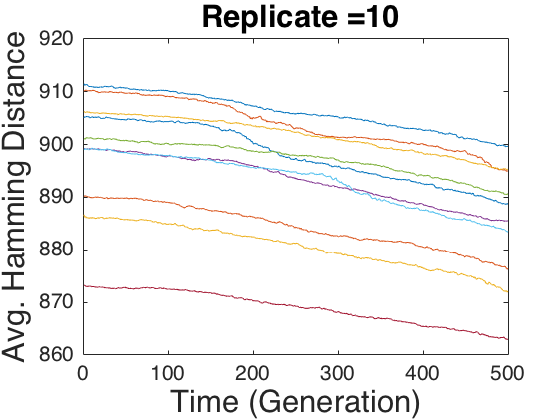

In [1]:
%General Parameters
N = 1000; %population size
num_loci = 1000;%number of loci in accessory genome
m = [100]; %m = [1, 10,50, 100, 1000, 10000];
mu_1 =  10^(-5);%mutation rate
rev_mut = .001;
num_essential = round(.25*num_loci);

%scalar values of some things
s_baggage = .01;%costs
s_gains = .1;%weights
frac_needed_scalar = .1; %fraction_needed
alpha= 1.96;
%vector values of the same things things
% weights = .1 * ones(1, num_loci);%vector of length "num_loci" denoting fitness contribution
%             %of each functional locus when needed
% costs = .001 * ones(1, num_loci);%vector denoting fitness cost of functional loci when not needed
% fraction_needed = .1 * ones(1, num_loci);%vector denoting fraction of environments each locus is needed


%simulation parameters
num_reps = 10; %number of replicate runs
time = 5*m;
%initialize data structures
avg_hamming_dist = nan(num_reps,time);
m_array_index = 0;





%for the figure
close all;
figure(1);
fontSize = 15;






change_rate = m;%number of gens btwn environmental changes


for j = 1:num_reps
    pop = [N,ones(1,num_loci),mu_1]; %starts all individuals with all functional loci
    rand_vect = rand(1,num_loci); %initializes with a random environment
    env = rand_vect<=frac_needed_scalar;
    k=1;
    counter = time + 1;
    avg_hamming_dist(j,1) = sum(pop(:,2:end-1) ~= repmat(env, [length(pop(:,1)) 1]),2);
    point_in_time = 0;
    
    while k == 1
        
       
        point_in_time = point_in_time + 1;
        if mod(counter,change_rate)==0 %determines if environment should change this generation
            rand_vect = rand(1,num_loci); %initializes with a random environment
            env = rand_vect<=frac_needed_scalar; %resets each environment
        end
        
        pop = mutate3(pop, rev_mut, num_essential); %mutate population
        %%%%%%%%%%% deals with extinction %%%%%%%%%%%%%%%%%%%
        if (size(pop,1) == 1) && (isnan(pop(:,2)))
            break
        end
        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        
        fitnesses = compute_fitness3(pop,s_gains,env,s_baggage); %computes fitnesses for each unique genotype
        
        pop = wright_fisher2(fitnesses); %performs wright_fisher sampling to update population to next generation
        avg_hamming_dist(j,point_in_time) = mean(sum(pop(:,2:end-1) ~= repmat(env, [length(pop(:,1)) 1]),2));
        
        
        
        if point_in_time == time
            k = 0;
        end
        
        
        
    end
    
    
end
x2=1:length(avg_hamming_dist);
y2=avg_hamming_dist;
plot(x2,y2)
title([' Replicate =' num2str(num_reps) ], 'FontSize', fontSize);
ylabel('Avg. Hamming Distance', 'FontSize', fontSize);
xlabel('Time (Generation)', 'FontSize', fontSize);
